#### The NBA, like any other professional sport, is not immune to change. Over the past three decades, we have witnessed significant shifts in the game's dynamics, rule alterations, and advancements in play style. This project seeks to investigate whether NBA players have become more productive on the court in the present day compared to 30 years ago or if their productivity has remained relatively consistent. By analyzing key statistical metrics such as points per game (PPG), assists per game (AST), and rebounds per game (REB), I will aim to draw meaningful conclusions about the changing nature of the game and its impact on player output.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#lets read in our data of over 12000 nba players
data = pd.read_csv("all_seasons.csv")
data

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            10516 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [58]:
#lets create some columns to drop since they won't be used

drop_columns = [ 'Unnamed: 0', 'college', 'country', 'player_weight', 'oreb_pct', 'dreb_pct', 'ts_pct', 'ast_pct',
               'player_height', 'usg_pct', ]
data.drop(drop_columns, axis='columns', inplace=True)


Text(0.5, 1.0, 'Points Per Game Distribution')

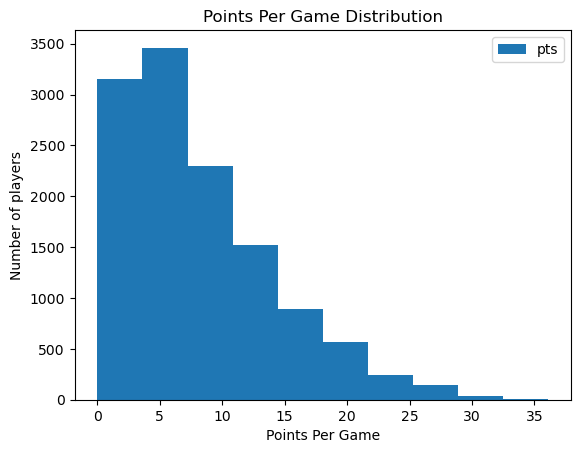

In [59]:
#lets examine ppg distribution to get a visual on how players are performing

data.plot(kind="hist", y="pts", bins=10)
plt.ylabel('Number of players')
plt.xlabel('Points Per Game')
plt.title('Points Per Game Distribution')

In [40]:
# lets take a look at the average ppg over the last 30 years
average_ppg = data['pts'].mean().round(1)

print(f'Average ppg over the last 30 years: {average_ppg} ppg')

Average ppg over the last 30 years: 8.2 ppg


In [11]:
#Now lets take a look at how the average ppg has changed over the last 30 years

ppg_by_season = data[['pts', 'season']].groupby('season').mean().sort_values('season', ascending=True).round(1).rename(columns={'pts': 'PPG'})

ppg_by_season.index.name = "Season"
ppg_by_season

,PPG
Season,
1996-97,8.0
1997-98,7.9
1998-99,7.4
1999-00,8.0
2000-01,7.8
2001-02,8.0
2002-03,7.8
2003-04,7.7
2004-05,8.1


Text(0.5, 1.0, 'Average PPG by Season')

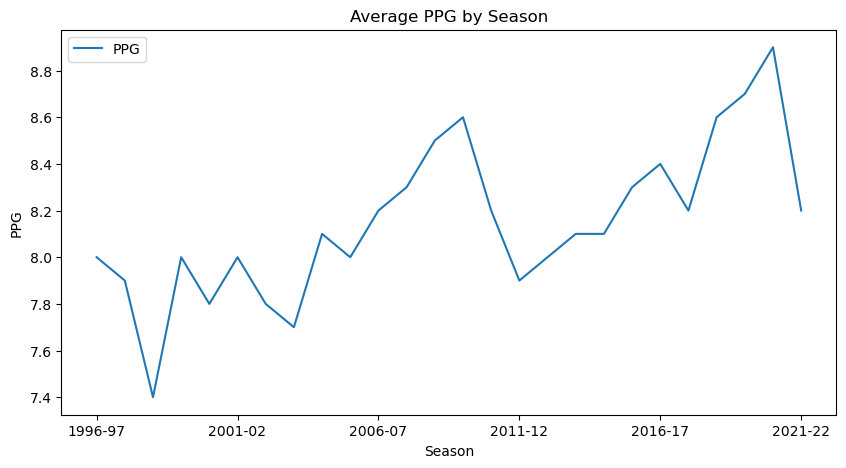

In [12]:
#lets make a graph out of this for a better visual

ppg_by_season.plot(kind='line', figsize=(10,5))
plt.ylabel('PPG')
plt.title('Average PPG by Season')

#### Based on the analysis of the graph and the data frame, we observe a small linear growth in player productivity over the last 30 years. However, this growth is not statistically significant enough to confidently conclude that players are scoring more now than they were three decades ago.

In [60]:
#lets examine the max ppg scored each season over the last 30 years

max_ppg_by_year = data.groupby('season')['pts'].max()
max_ppg_players = data.loc[data.groupby('season')['pts'].idxmax()][['season', 'player_name', 'pts']]
max_ppg_players.columns = ['Season', 'Player Name', 'Max PPG']
max_ppg_players

,Season,Player Name,Max PPG
392,1996-97,Michael Jordan,29.6
479,1997-98,Michael Jordan,28.7
1019,1998-99,Allen Iverson,26.8
1554,1999-00,Shaquille O'Neal,29.7
1920,2000-01,Allen Iverson,31.1
2489,2001-02,Allen Iverson,31.4
2953,2002-03,Tracy McGrady,32.1
3181,2003-04,Tracy McGrady,28.0
3664,2004-05,Allen Iverson,30.7
4342,2005-06,Kobe Bryant,35.4


Text(0.5, 1.0, 'Max PPG by Season')

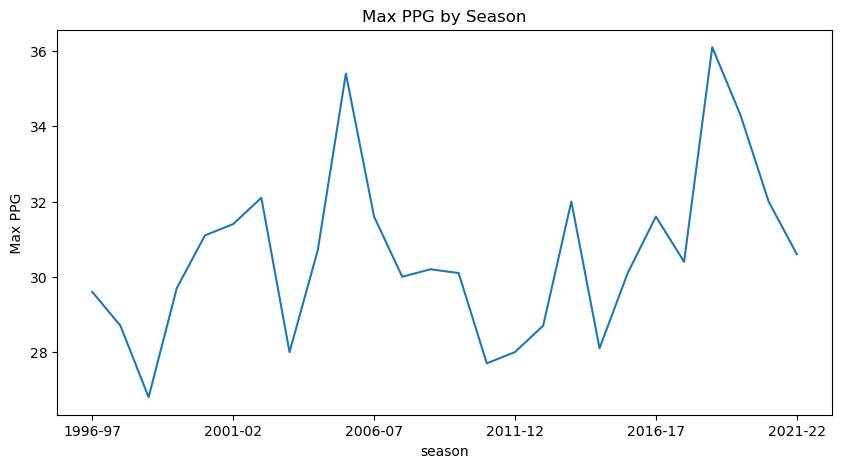

In [62]:
#lets create a graph for better visual

max_ppg_by_year.plot(kind='line', figsize=(10,5))
plt.ylabel(' Max PPG ')
plt.title('Max PPG by Season')

####  Similar to the PPG distribution over thirty years, a small linear growth can be seen. However, this increase is not substantial enough to confidently conclude that the top players are scoring significantly more now than they were three decades ago.

#### Lets now move on to examining the assist per game distribution.

Text(0.5, 1.0, 'Assist per game distribution')

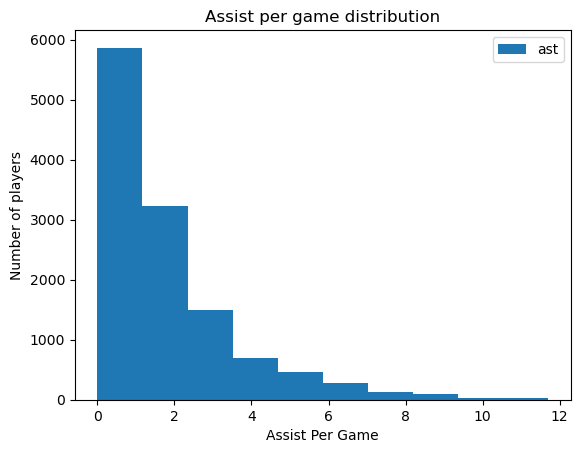

In [63]:
#lets examine assist per game distribution

data.plot(kind="hist", y="ast", bins=10)
plt.ylabel('Number of players')
plt.xlabel('Assist Per Game')
plt.title('Assist per game distribution')

In [64]:
#lets look at the average assist per game

average_ast = data['ast'].mean().round(1)

print(f'Average assist per game over the last 30 years: {average_ast} ast')

Average assist per game over the last 30 years: 1.8 ast


In [65]:
#Now lets take a look at how the average ast per game has changed over the last 30 years

ast_by_season = data[['ast', 'season']].groupby('season').mean().sort_values('season', ascending=True).round(1).rename(columns={'ast': 'AST'})

ast_by_season.index.name = "Season"
ast_by_season

,AST
Season,
1996-97,1.8
1997-98,1.8
1998-99,1.7
1999-00,1.9
2000-01,1.8
2001-02,1.8
2002-03,1.8
2003-04,1.8
2004-05,1.8


Text(0.5, 1.0, 'Average AST per game by Season')

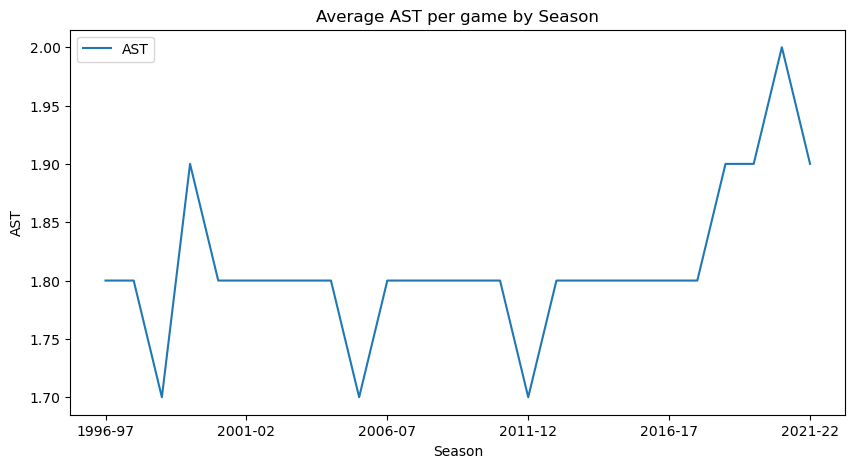

In [66]:
#lets make a graph out of this for a better visual

ast_by_season.plot(kind='line', figsize=(10,5))
plt.ylabel('AST')
plt.title('Average AST per game by Season')

#### Differing from the Average PPG distribution, we cant' observe a small linear growth in player productivity over the last 30 years. Therefore, we cannot confidently conclude that players are assisting their teammates more now than they were three decades ago.

In [67]:
#lets take a look at the assist leaders over three decades

max_ast_by_year = data.groupby('season')['ast'].max()
max_ast_players = data.loc[data.groupby('season')['ast'].idxmax()][['season', 'player_name', 'ast']]
max_ast_players.columns = ['Season', 'Player Name', 'Max AST']
max_ast_players

,Season,Player Name,Max AST
430,1996-97,Mark Jackson,11.4
618,1997-98,Rod Strickland,10.5
1311,1998-99,Jason Kidd,10.8
1380,1999-00,Jason Kidd,10.1
2051,2000-01,Jason Kidd,9.8
2483,2001-02,Andre Miller,10.9
2786,2002-03,Jason Kidd,8.9
3400,2003-04,Jason Kidd,9.2
3577,2004-05,Steve Nash,11.5
4295,2005-06,Steve Nash,10.5


Text(0.5, 1.0, 'Max AST per game by Season')

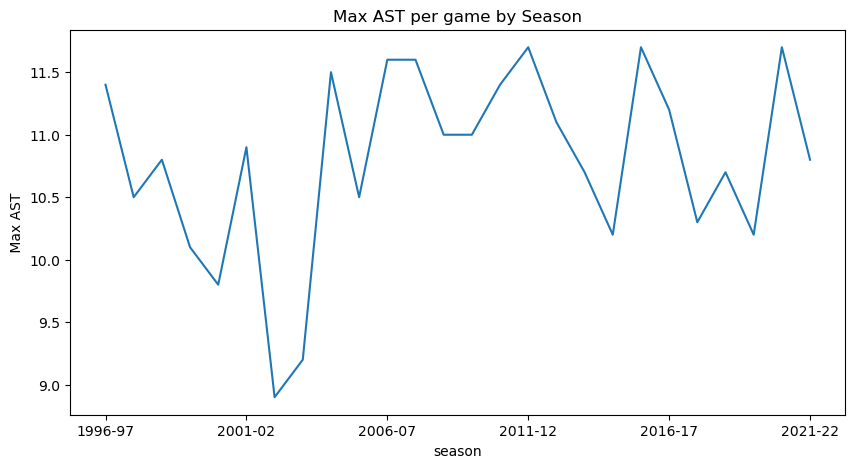

In [76]:
#lets make a graph for a better visual

max_ast_by_year.plot(kind='line', figsize=(10,5))
plt.ylabel(' Max AST ')
plt.title('Max AST per game by Season')

#### Similar to the average assist per game distribution, we cant' observe a small linear growth in player productivity over the last 30 years. Therefore, we cannot confidently conclude that the top players are assisting their teammates more now than they were three decades ago.  

#### Lets now move on to examining the Rebounds per game distribution.

Text(0.5, 1.0, 'Rebounds per game distribution')

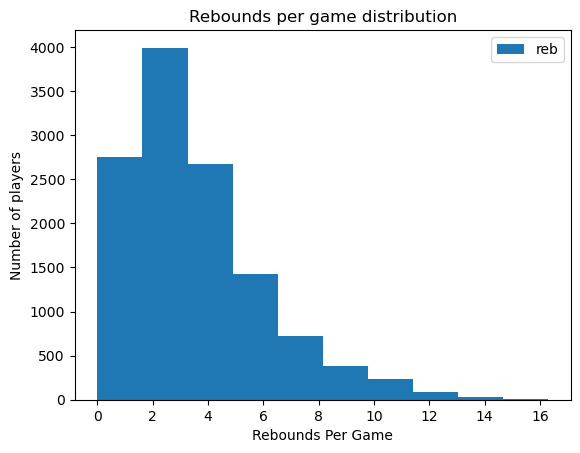

In [69]:
#lets examine reb per game distribution

data.plot(kind="hist", y="reb", bins=10)
plt.ylabel('Number of players')
plt.xlabel('Rebounds Per Game')
plt.title('Rebounds per game distribution')

In [70]:
average_reb = data['reb'].mean().round(1)

print(f'Average rebounds per game over the last 30 years: {average_reb} reb')

Average rebounds per game over the last 30 years: 3.6 reb


In [71]:
#Now lets take a look at how the average reb per game has changed over the last 30 years

reb_by_season = data[['reb', 'season']].groupby('season').mean().sort_values('season', ascending=True).round(1).rename(columns={'reb': 'REB'})

reb_by_season.index.name = "Season"
reb_by_season

,REB
Season,
1996-97,3.5
1997-98,3.5
1998-99,3.4
1999-00,3.7
2000-01,3.6
2001-02,3.6
2002-03,3.6
2003-04,3.6
2004-05,3.6


Text(0.5, 1.0, 'Average REB per game by Season')

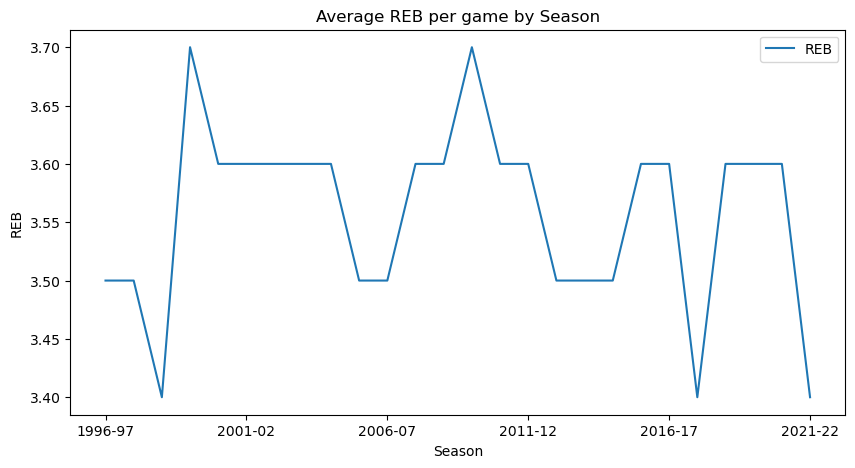

In [72]:
#lets make a graph out of this for a better visual

reb_by_season.plot(kind='line', figsize=(10,5))
plt.ylabel('REB')
plt.title('Average REB per game by Season')

#### Based on the data frame and the graph, it is evident that there has been no substantial growth in rebounds per game over the past three decades. So we can conclude that players were rebounding just as well three decades ago as they are now. 

In [73]:
#lets look at the rebound leaders

max_reb_by_year = data.groupby('season')['reb'].max()
max_reb_players = data.loc[data.groupby('season')['reb'].idxmax()][['season', 'player_name', 'reb']]
max_reb_players.columns = ['Season', 'Player Name', 'Max REB']
max_reb_players

,Season,Player Name,Max REB
0,1996-97,Dennis Rodman,16.1
728,1997-98,Dennis Rodman,15.0
963,1998-99,Chris Webber,13.0
1354,1999-00,Dennis Rodman,14.3
1791,2000-01,Danny Fortson,16.3
2518,2001-02,Ben Wallace,13.0
2741,2002-03,Ben Wallace,15.4
3134,2003-04,Kevin Garnett,13.9
3769,2004-05,Kevin Garnett,13.5
4364,2005-06,Kevin Garnett,12.7


Text(0.5, 1.0, 'Max REB per game by Season')

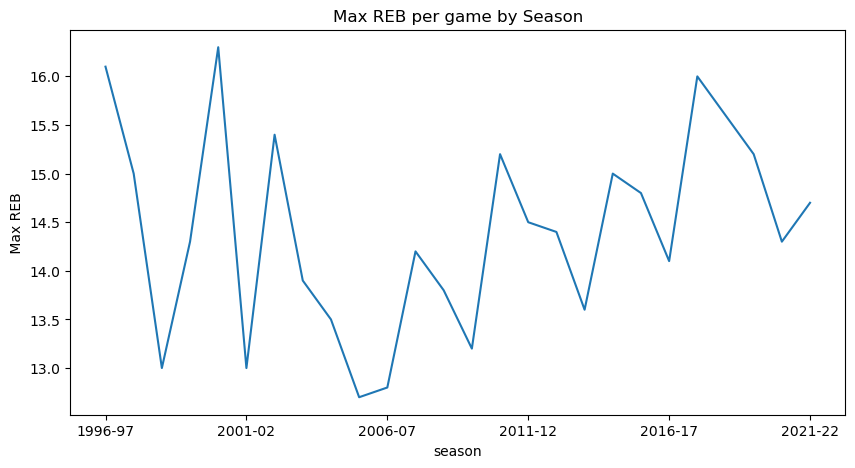

In [75]:
#lets make a graph for a better visual

max_reb_by_year.plot(kind='line', figsize=(10,5))
plt.ylabel(' Max REB ')
plt.title('Max REB per game by Season')

#### Upon analyzing the dataframe and graph, it's evident that rebounding performance across the league has remained largely unchanged over the past three decades.

### In summary, this project has led to the conclusion that NBA players are not significantly more productive now compared to three decades ago. Contrary to the initial hypothesis, my analysis of various statistical metrics, including points, assists, and rebounds per game, shows a relatively stable performance trend over this period. This shows the enduring consistency in player productivity in the ever-evolving landscape of the NBA.